# Uniswap V3 price analysis

In this notebook we will show how to download price events from Uniswap V3 to your computer as CSV files and use them to analyse price in each pool

### Setup the notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt

from eth_defi.uniswap_v3.constants import UNISWAP_V3_FACTORY_CREATED_AT_BLOCK
from eth_defi.uniswap_v3.events import fetch_events_to_csv

### Download the raw data

For simplicity, you can sign up for free access to an Ethereum node for example at [Infura](https://infura.io/), however we recommend you to [run your own Ethereum node](https://tradingstrategy.ai/blog/preparing-a-server-for-hosting-goethereum-full-node)

In [ ]:
json_rpc_url = input("Please enter your JSON-RPC URL here")

As an example, here we download raw events from first 1000000 blocks after Uniswap V3 factory is created, the events will be stored in several CSV files at `/tmp` folder

In [ ]:
start_block = UNISWAP_V3_FACTORY_CREATED_AT_BLOCK
end_block = UNISWAP_V3_FACTORY_CREATED_AT_BLOCK + 1_000_000

fetch_events_to_csv(json_rpc_url, start_block=start_block, end_block=end_block)

### Analyse the pool's price

In Uniswap V3, you can get the price of any pool from any given moment using only swap events

In [242]:
swap_df = pd.read_csv("/tmp/uniswapv3-Swap.csv")

Choose a pool to analyse, for example: USDC/ETH 0.3%

In [ ]:
pool_address = "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"

Extract only swaps related to this pool from the dataframe

In [243]:
df = swap_df[swap_df.pool_contract_address == pool_address]
df

,block_number,timestamp,tx_hash,log_index,pool_contract_address,amount0,amount1,sqrt_price_x96,liquidity,tick
19,12371376,2021-05-05T01:56:23,0xce7c3c307d820785caa12938012372fc9366a614a6aa...,26,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,-329608,100000000000000,1377932816571815120446551350158799,4303369674465501,195285
21,12373132,2021-05-05T08:23:26,0x9a1c51b0bffbf840948f3b6e3f3e495ba1cd3fa64854...,192,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,-164694492,50000000000000000,1378850591292581266780357299649652,4303369674465501,195298
25,12373520,2021-05-05T09:50:51,0xc58715c62a5bf70a6ca09f0e51546d6cad76c8d4fff0...,8,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,-329169,100000000000000,1378852426842022799073024911548633,4303369674465501,195298
26,12374077,2021-05-05T11:59:57,0x288c21b8b4fbf449b1d086a06e43b124ac2bc088c3f5...,86,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,2,-329169,1378852426842016741051966412054516,4304946248093346,195298
27,12374320,2021-05-05T12:56:56,0x67502d8ba373287f6d301f6baa77c5a5f4c80d0753c3...,257,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,1559137299,-467880854065813753,1370241555019945317645788135487819,4304946248093346,195173
...,...,...,...,...,...,...,...,...,...,...
6018341,13369549,2021-10-07T03:54:12,0x85a790a28a7e2f6c6255b1a4a2abf8b537dbf816d5f7...,303,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,9544379406,-2697797591994908356,1334014708503607758755704192735439,15669055583530736007,194637
6018357,13369551,2021-10-07T03:55:31,0x904bed6c905faaedfc18254532be0d6c91b72d757d3d...,347,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,1800000000,-508778668573156357,1334012135942752216622738653868477,15669055583530736007,194637
6018395,13369558,2021-10-07T03:57:07,0xa3b563f986c6a7afab60a5e6767f406f06c9009b79ba...,25,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,-9602407975,2730548345796589245,1334025901119470094161818952314405,15669055583530736007,194637
6018569,13369595,2021-10-07T04:03:41,0xc1361ad72cfa070d588545e66847d09a055c30aefff0...,38,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,13606859527,-3846060323645415358,1334006475541153510870103639896253,15686343407408975548,194637


In Uniswap V3, we can easily get pool's price from pool's tick

In [ ]:
def tick_to_price(tick):
    return 1.0001**tick

df["price"] = df.apply(lambda row: tick_to_price(row["tick"]), axis=1)

Then we can plot the price of this pool in first 1000000 blocks

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000.]),
 [Text(-20000.0, 0, '2021-08-30T18:02:20'),
  Text(0.0, 0, '2021-05-05T01:56:23'),
  Text(20000.0, 0, '2021-05-20T19:22:20'),
  Text(40000.0, 0, '2021-05-27T13:15:57'),
  Text(60000.0, 0, '2021-06-09T03:04:48'),
  Text(80000.0, 0, '2021-06-25T21:40:05'),
  Text(100000.0, 0, '2021-07-23T23:38:06'),
  Text(120000.0, 0, '2021-08-22T14:56:03'),
  Text(140000.0, 0, '2021-09-30T00:47:44'),
  Text(160000.0, 0, '')])

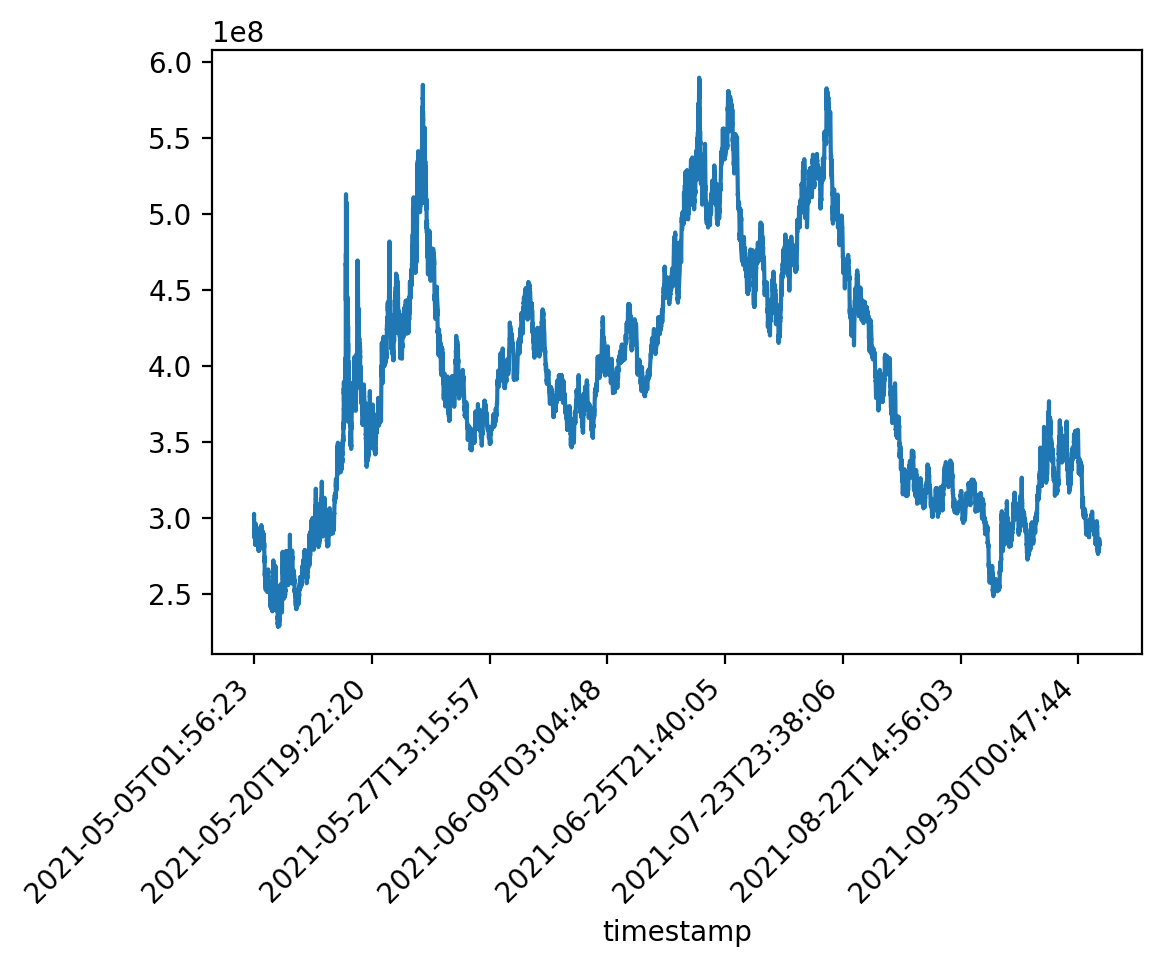

In [245]:
plt.rcParams["figure.dpi"] = 200

df.index = df.timestamp
df["price"].plot()

plt.xticks(rotation=45, ha="right")